In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
from sklearn.metrics import confusion_matrix

In [40]:
wine = datasets.load_wine()
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df["target"] = wine["target"]
df.head(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [41]:
df.shape

(178, 14)

In [42]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [43]:
X = df.drop(columns = ["target"], axis=1)
Y = df["target"]

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=55)

In [45]:
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [46]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
KNN.score(X_test, Y_test)

0.8333333333333334

In [48]:
Pred = KNN.predict(X_train)

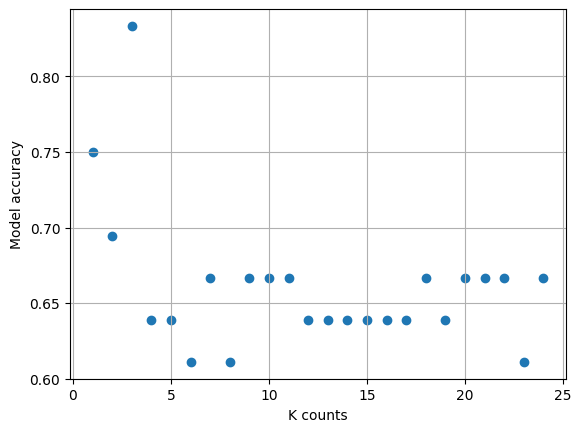

In [49]:
k_range = range(1,25)
score = []

for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train, Y_train)
  score.append(KNN.score(X_test, Y_test))

plt.figure()
plt.xlabel("K counts")
plt.ylabel("Model accuracy")
plt.scatter(k_range, score)
plt.grid()
plt.show()

In [52]:
predictions = KNN.predict(X_test)
predictions

array([0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1])

In [54]:
CM = confusion_matrix(Y_test, predictions)
CM

array([[ 8,  0,  0],
       [ 0, 11,  4],
       [ 3,  5,  5]])